<table style="width:100%">
  <tr>
    <th> <img src="logo_EPM_UNIOVI_CabeceroWEB.gif" alt="Uniovi & EP Mieres logos" title="Uniovi & EP Mieres logos" /></th>
    <th><font color=brown>Procesamiento de imágenes de Sensores Aerotransportados y Satélite</font>
         </font></th> 
    <th><font color=green>Universidad de Oviedo.                       Ingeniería en Geomática</font>        sgcortes@uniovi.es</th>
  </tr>
</table>

Veamos las funciones de OpenCV que se encargan de las transformaciones geométricas de las imágenes. Los links de la librería y la documentación correspondiente son: https://opencv.org/ 
https://docs.opencv.org/3.4.3/index.html

## 2.2 Transformacion proyectiva

Las transformaciones vistas en la sección atnerior (escalado, traslación rotación) generalmente se componen en una sola transformación global  desee implementar. En el caso de trasnformacion proyectiva (que es no-afín y por lo tanto no respeta el paralelismo, se emplea para corregir la distorsión perspectiva.

In [59]:
pwd

'C:\\Users\\Usuario\\TDI_GEOSPATIAL'

### 2.1.1 Transformación Proyectiva

In [67]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('scan.jpg')
print(np.dtype(image))
#plt.imshow(image)
cv2.imshow('Original', image)
cv2.waitKey(0)

# Cordinates de 4 esquinas de l aimagen original
points_A = np.float32([[320,15], [700,215], [85,610], [530,780]])

# Coordenadas de las 4 esquinas deseadas
# El papel es un DIN A4 que tiene un ratio de aspecto 1 : 1.41
points_B = np.float32([[0,0], [420,0], [0,594], [420,594]])
 
# Calculamos la amtriz de transformacion proyectiva, M    
M = cv2.getPerspectiveTransform(points_A, points_B)
print(M)
# Aplicamos la transformacion
warped = cv2.warpPerspective(image, M, (420,594))
 
plt.imshow(warped)

float64


error: ..\..\..\modules\highgui\src\window.cpp:281: error: (-215) size.width>0 && size.height>0 in function cv::imshow


### 2.1.2 Rotación
**cv2.getRotationMatrix2D(rotation_center_x, rotation_center_y, angle of rotation, scale)**.La función de rotación puede realizar al mismo tiempo un cambio de escala.

430 630
[[ 3.061617e-17  5.000000e-01  2.075000e+02]
 [-5.000000e-01  3.061617e-17  3.725000e+02]]


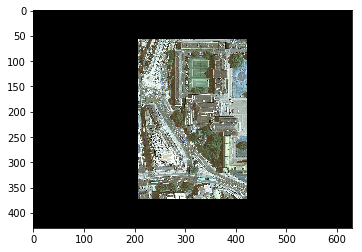

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('Dublin_2.jpg',1)
height, width = image.shape[:2]
print(height, width)
# Rotemos la imagen alrededor de un punto situado en su centro 
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, .5)
print(rotation_matrix)
rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
plt.imshow(rotated_image)

Como puede verse el ángulo de rotación es antihorario. En todo caso se crea una zona muy grande de píxeles neggros alrededor de la imagen que deberíamos cortar para terminar el trabajo. Si el ángulod egiro es de 90 o múltiplo, podemos emplear la función: **cv2.transpose** 

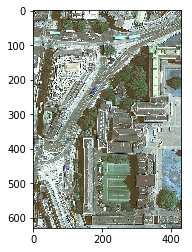

In [38]:
rotated_image = cv2.transpose(image)
plt.imshow(rotated_image)

Otras funciones como **cv2.flip** son también de posible utilidad para el giro

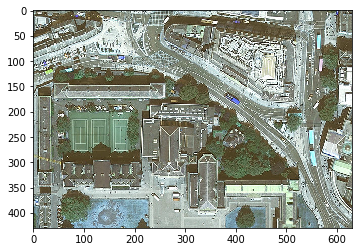

In [39]:
flipped = cv2.flip(image, 1)
plt.imshow(flipped)

### 2.1.3 Escalado e interpolación
**cv2.resize(image, dsize(output image size), x scale, y scale, interpolation)**

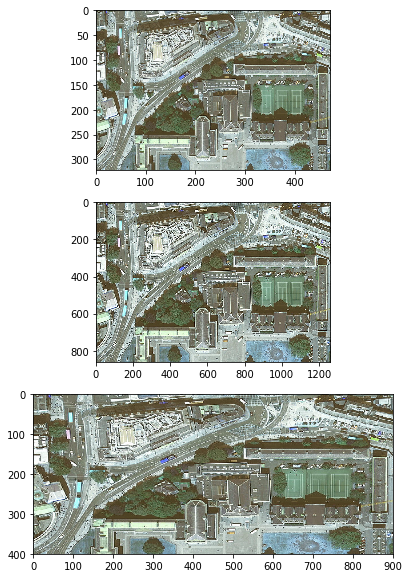

In [40]:
image = cv2.imread('Dublin_2.jpg')
# Imagen 3/4 de la original
image_scaled = cv2.resize(image, None, fx=0.75, fy=0.75)
plt.figure(figsize=(10,10))
plt.subplot(311)
plt.imshow(image_scaled) 

# Imagen el doble de la original
img_scaled = cv2.resize(image, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
plt.subplot(312)
plt.imshow(img_scaled)

# Ahora establecemos las dimensiones exactas de la imagen final y definimos 
# el método de reescalado

img_scaled = cv2.resize(image, (900, 400), interpolation = cv2.INTER_AREA)
plt.subplot(313)
plt.imshow(img_scaled) 

### 2.1.4 Pirámides de imágenes
las funciones **pyrDown** y **pyrUp** generan versiones menores y mayores respectivamente de la imagen dada. En rigo deberían también en el caso de la disminución de tamaño aplicar un filtro que elimine las altas frecuencias previo a la reducción del tamaño. 

Text(0.5,1,'Grande')

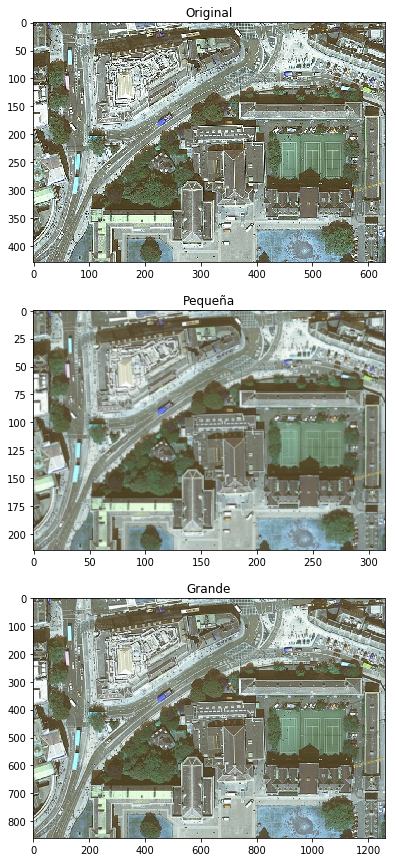

In [53]:
import cv2
image = cv2.imread('Dublin_2.jpg')
smaller = cv2.pyrDown(image)
larger = cv2.pyrUp(image)
plt.figure(1,figsize=(15,15))
plt.subplot(311)
plt.imshow(image)
plt.title('Original')
plt.subplot(312)
plt.imshow(smaller)
plt.title('Pequeña')
plt.subplot(313)
plt.imshow(larger)
plt.title('Grande')